=== Dataset Preview ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values in Each Column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcom

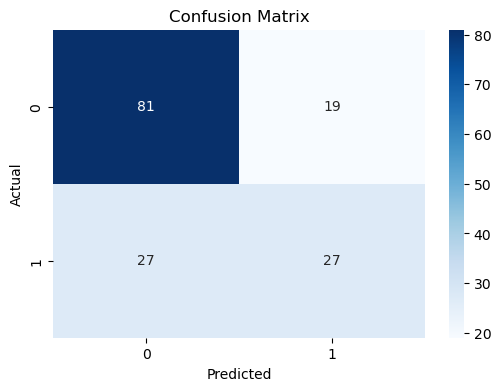

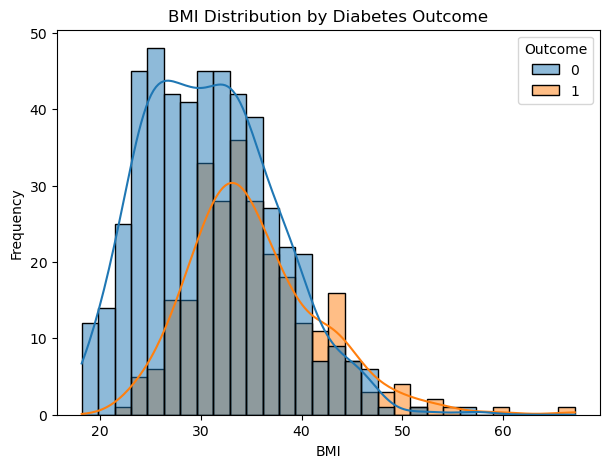


=== Top Factors Influencing Diabetes ===
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.644124
0               Pregnancies     0.115649
5                       BMI     0.103737
1                   Glucose     0.040221
7                       Age     0.012490
3             SkinThickness     0.002551
4                   Insulin    -0.000939
2             BloodPressure    -0.004209


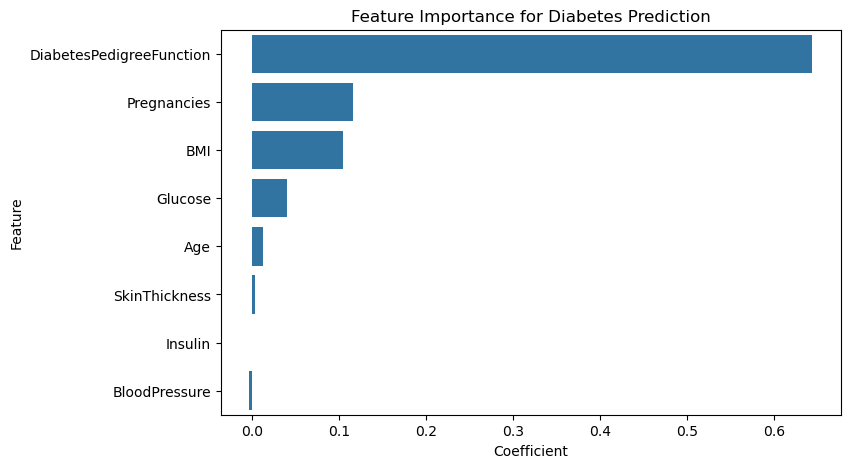


 Logistic Regression performed well for predicting diabetes.


In [1]:
# =============================
# Step 0: Import Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# =============================
# Step 1: Load the Dataset
# =============================
# Make sure diabetes.csv is in your working directory
data = pd.read_csv("diabetes.csv")  

print("=== Dataset Preview ===")
print(data.head())
print("\nMissing Values in Each Column:\n", data.isnull().sum())

# =============================
# Step 2: Handle Missing Values
# =============================
# Columns where 0 is invalid and should be treated as NaN
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
data[cols_with_zero_invalid] = data[cols_with_zero_invalid].replace(0, np.nan)

# Fill NaN with median values (safe assignment, avoids chained warning)
for col in cols_with_zero_invalid:
    data[col] = data[col].fillna(data[col].median())

print("\nMissing values after cleaning:\n", data.isnull().sum())

# =============================
# Step 3: Define Features and Target
# =============================
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =============================
# Step 4: Logistic Regression Model
# =============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# =============================
# Step 5: Evaluation Metrics
# =============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# =============================
# Step 6: Visualization (BMI vs Diabetes)
# =============================
plt.figure(figsize=(7,5))
sns.histplot(data=data, x="BMI", hue="Outcome", kde=True, bins=30)
plt.title("BMI Distribution by Diabetes Outcome")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# =============================
# Step 7: Feature Importance (Insights)
# =============================
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\n=== Top Factors Influencing Diabetes ===")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance for Diabetes Prediction")
plt.show()

# =============================
# Step 8: English Summary of Model
# =============================
if accuracy > 0.7:
    print("\n Logistic Regression performed well for predicting diabetes.")
else:
    print("\n Logistic Regression performance is moderate; consider more features or other models.")
